In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ENB2012_data.csv")
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [39]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.isnull().sum()


,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


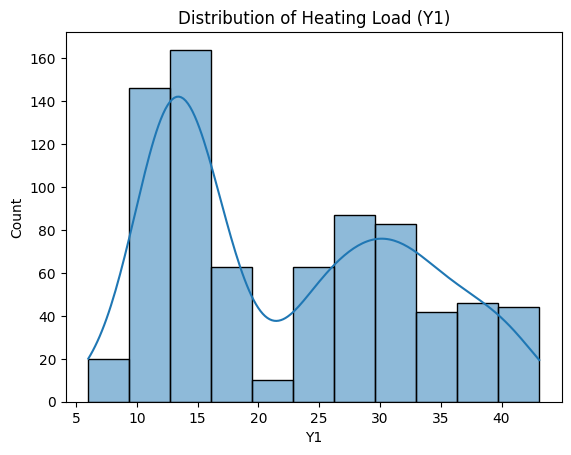

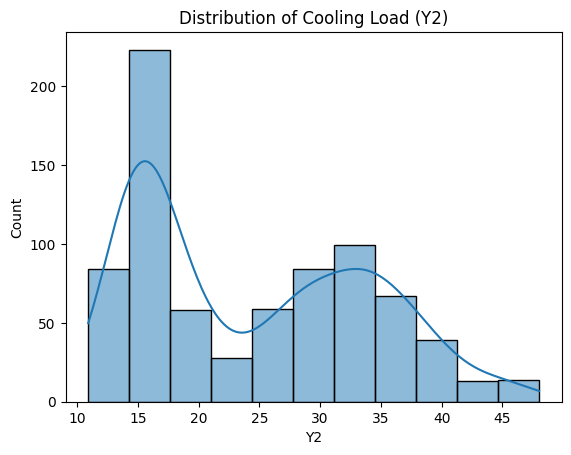

In [42]:
sns.histplot(df['Y1'], kde=True)
plt.title('Distribution of Heating Load (Y1)')
plt.show()

sns.histplot(df['Y2'], kde=True)
plt.title('Distribution of Cooling Load (Y2)')
plt.show()

In [43]:
df_copy = df.copy()


In [44]:
# df_copy = pd.get_dummies(df_copy, columns=['X6', 'X8'], drop_first=True)


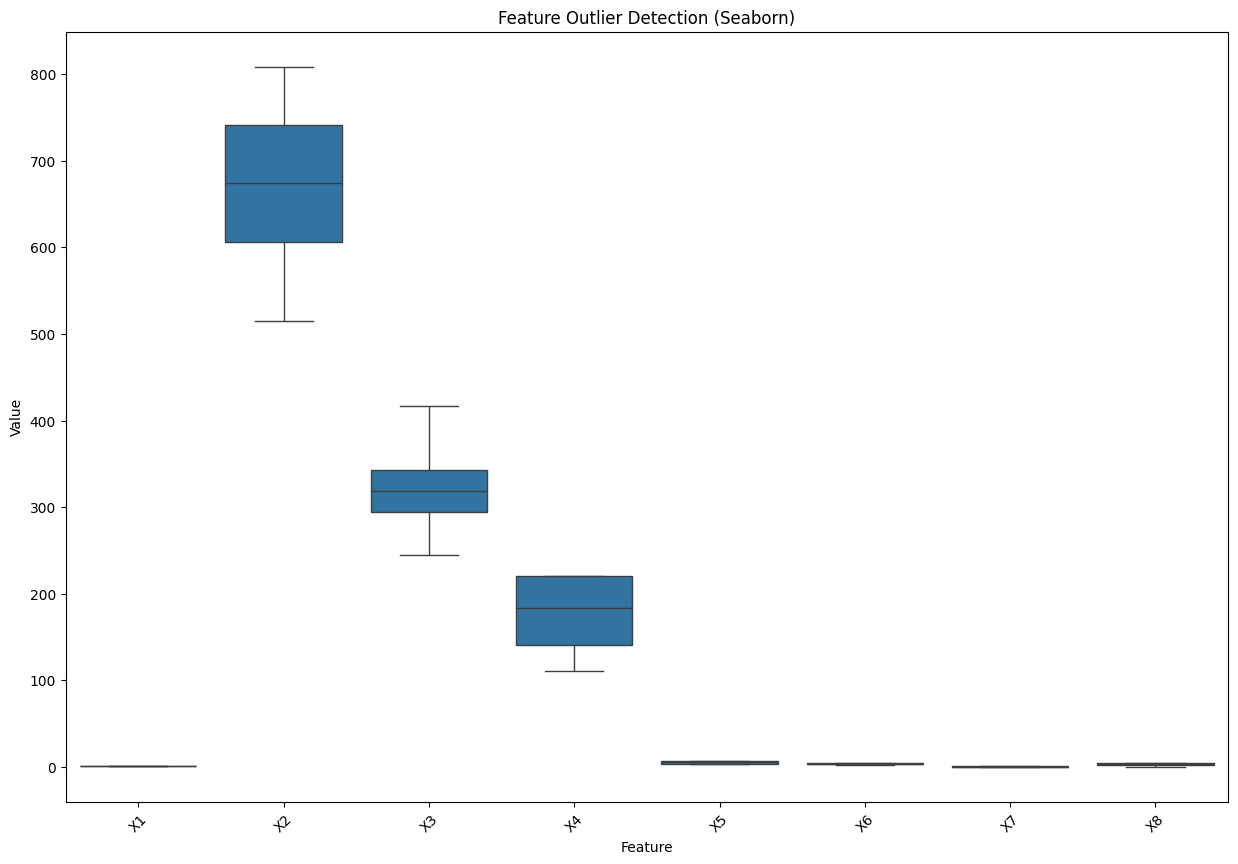

In [45]:
# Reshape the data: drop target columns and melt the rest into long format
df_melted = df_copy.drop(['Y1', 'Y2'], axis=1).melt(var_name='Feature', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Feature Outlier Detection (Seaborn)')
plt.xticks(rotation=45)
plt.show()

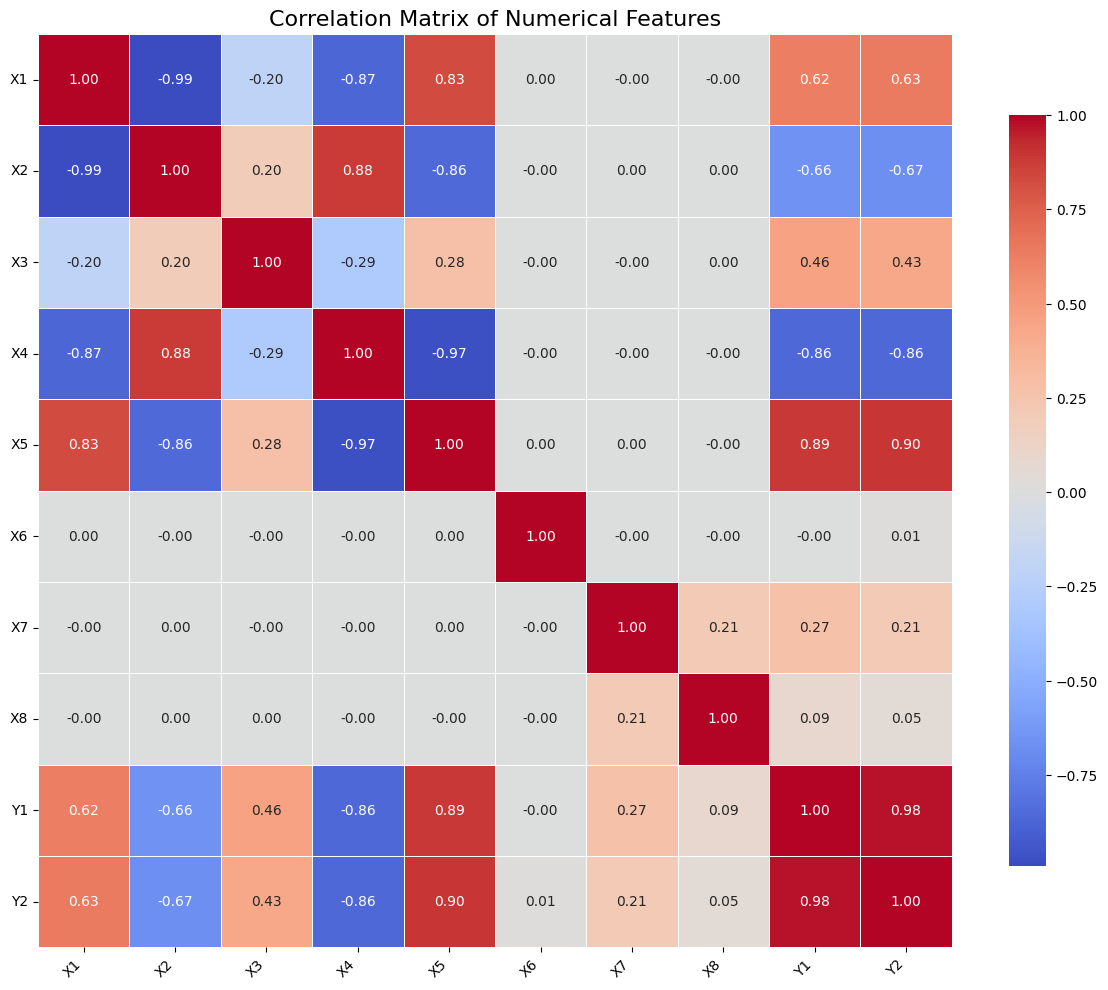

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric features
corr = df_copy.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format floats to 2 decimal places
    cmap="coolwarm",       # Color map
    linewidths=0.5,        # Line between boxes
    cbar_kws={"shrink": 0.8},  # Shrink color bar
    square=True            # Square cells for a neater look
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
df_copy.drop(columns=['X6', 'X7', 'X8'], inplace=True)


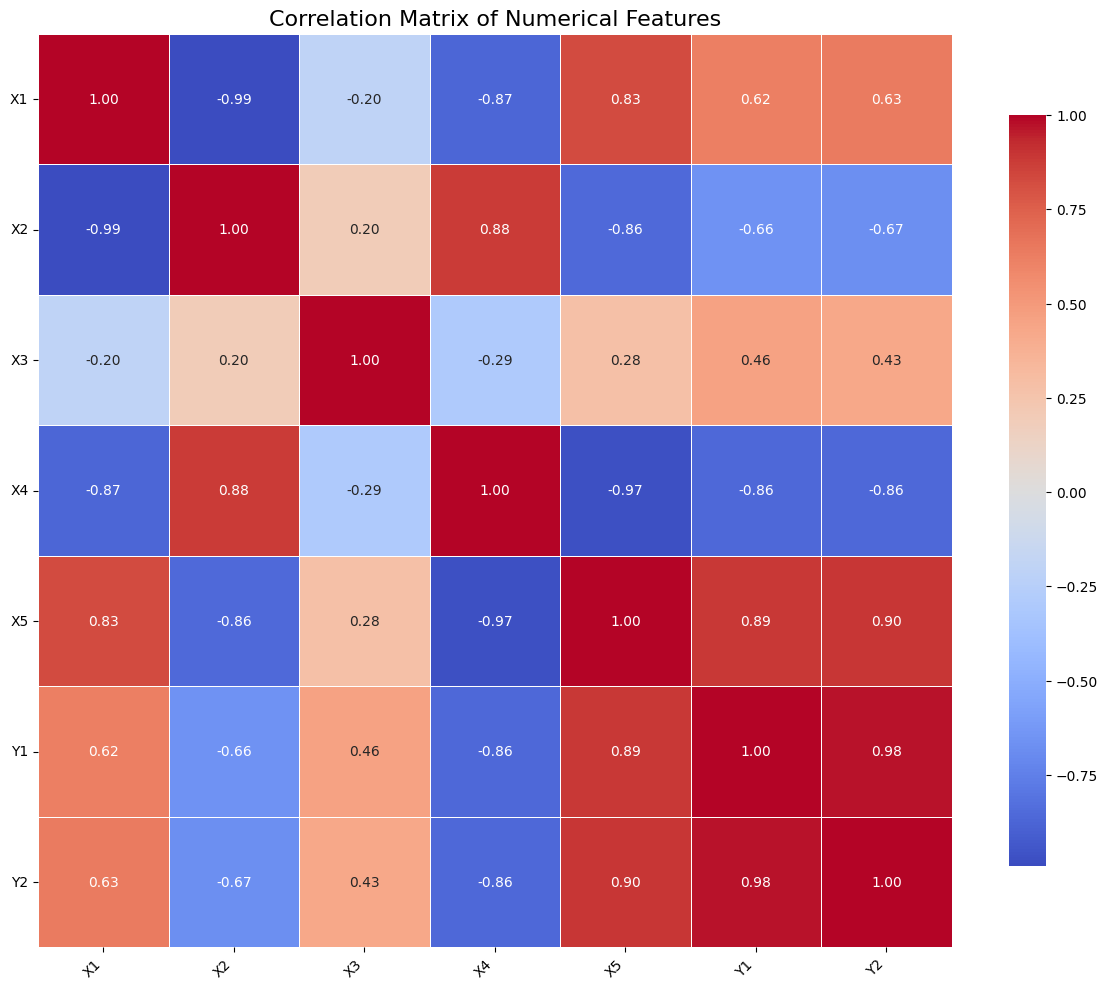

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric features
corr = df_copy.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format floats to 2 decimal places
    cmap="coolwarm",       # Color map
    linewidths=0.5,        # Line between boxes
    cbar_kws={"shrink": 0.8},  # Shrink color bar
    square=True            # Square cells for a neater look
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
print(data.columns)


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'Y1', 'Y2'], dtype='object')


In [50]:
from sklearn.model_selection import train_test_split

data = df_copy.copy()

# Replace 'target' with the actual name of your target column
X = data[['X1', 'X2', 'X3', 'X4', 'X5']]
y = data[['Y1', 'Y2']]  # Note: double brackets for DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error ,r2_score

##Evaluate model performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse= mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

#R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#Output
print("Training MSE:",train_mse)
print("Testing MSE:",test_mse)
print("Training R-Squared:",train_r2)
print("Testing R-Squared:",test_r2)

Training MSE: 15.161189264944193
Testing MSE: 14.612678730750808
Training R-Squared: 0.8409327061461475
Testing R-Squared: 0.8516925183420241


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score

# Example for Random Forest on Heating_Load
y = df_copy['Y1']
X = df_copy.drop(['Y1', 'Y2'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

rf = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))


Cross-validated R² scores: [0.55812452 0.9417078  0.99411933 0.91078977 0.85901134]
Mean R²: 0.8527505527509597


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Tuned RMSE:", rmse)
print("Tuned R² Score:", r2_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RMSE: 2.910094645195429
Tuned R² Score: 0.9141961926761357
